In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Pendulum
In the previous homework you have solved system of first order differential equations,

$$
\frac{dx_i}{dt} = f_i(\vec x, t, p) \qquad \vec x = (x_1, \cdots, x_N) \text{ and } p \text{ list of constants}
$$

The same method can also be applied to solve second order ordinary differential equations as well by writing them as a system of first order differetial equations. For example, Consider the motion of a pendulum, whose equation of motion is given by

$$
\frac{d^2\theta}{dt^2} = - \sin(\theta)
$$

which can be rewritten as, 

\begin{align*}
    \frac{d\theta}{dt} &= \omega, \\
    \frac{d\omega}{dt} &= -\sin(\theta).
\end{align*}

Taking $\vec x = (\theta, \omega)$ one can solve this system.


**Q1.1)** Solve for the motion of pendulum for some intial condition and plot $\theta$ vs $t$ and the phase space $\theta$ vs $\omega$. You can either use your ode solver from your previous homework or use the package `scipy`.

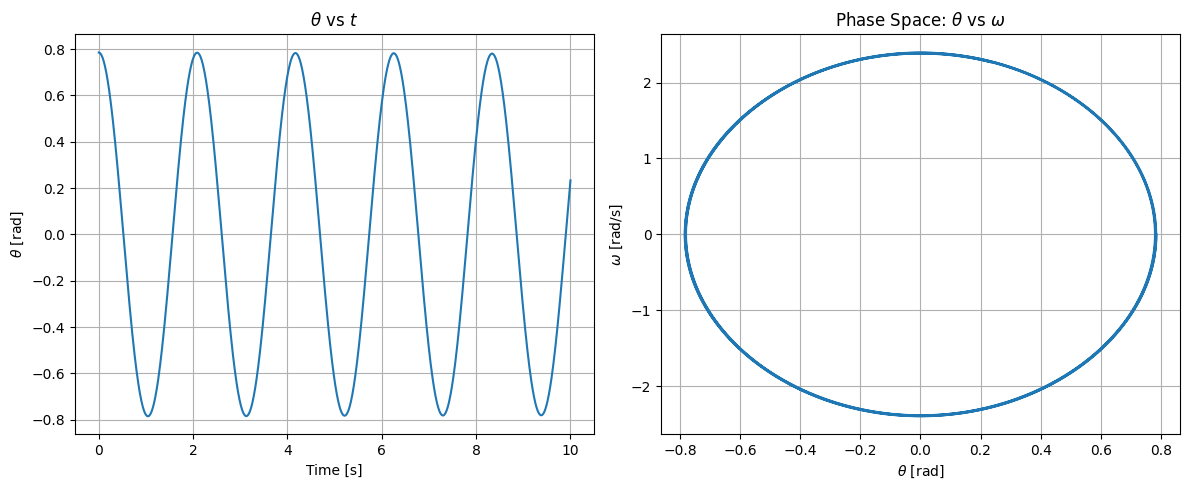

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from functools import partial

# Pendulum parameters as immutable constants
PENDULUM_PARAMS = {"g": 9.81, "L": 1.0}
theta0 = np.pi / 4  # Initial angle (45 degrees)
omega0 = 0.0        # Initial angular velocity

# Function to define the ODE system
def pendulum_ode(t, y, params):
    g, L = params["g"], params["L"]
    theta, omega = y
    return [omega, -(g / L) * np.sin(theta)]

# Function to solve the pendulum motion
def solve_pendulum(ode_func, initial_conditions, t_range, t_points):
    t_eval = np.linspace(t_range[0], t_range[1], t_points)
    return solve_ivp(ode_func, t_range, initial_conditions, t_eval=t_eval)


# Function to plot results
def plot_results(solution, title_theta_vs_t, title_phase_space):
    theta, omega = solution.y
    t = solution.t

    # Plot theta vs. t
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(t, theta, label=r'$\theta(t)$')
    plt.title(title_theta_vs_t)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\theta$ [rad]')
    plt.grid(True)

    # Plot phase space (theta vs. omega)
    plt.subplot(1, 2, 2)
    plt.plot(theta, omega, label=r'Phase space: $\theta$ vs $\omega$')
    plt.title(title_phase_space)
    plt.xlabel(r'$\theta$ [rad]')
    plt.ylabel(r'$\omega$ [rad/s]')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main functional pipeline
def main():
    # Initial conditions: theta0, omega0
    initial_conditions = [np.pi / 4, 0.0]  # [45 degrees, 0 angular velocity]
    t_range = (0, 10)  # Time range in seconds
    t_points = 1000    # Number of time points

    # Partial function for the ODE to inject parameters
    ode_func = partial(pendulum_ode, params=PENDULUM_PARAMS)

    # Solve the pendulum motion
    solution = solve_pendulum(ode_func, initial_conditions, t_range, t_points)

    # Plot the results
    plot_results(solution, title_theta_vs_t=r'$\theta$ vs $t$', title_phase_space=r'Phase Space: $\theta$ vs $\omega$')

# Execute the main pipeline
if __name__ == "__main__":
    main()


**Bonus Question** : Compare the dynamics with the simple harmonic appximation $\frac{d^2\theta}{dt^2} = - \theta$

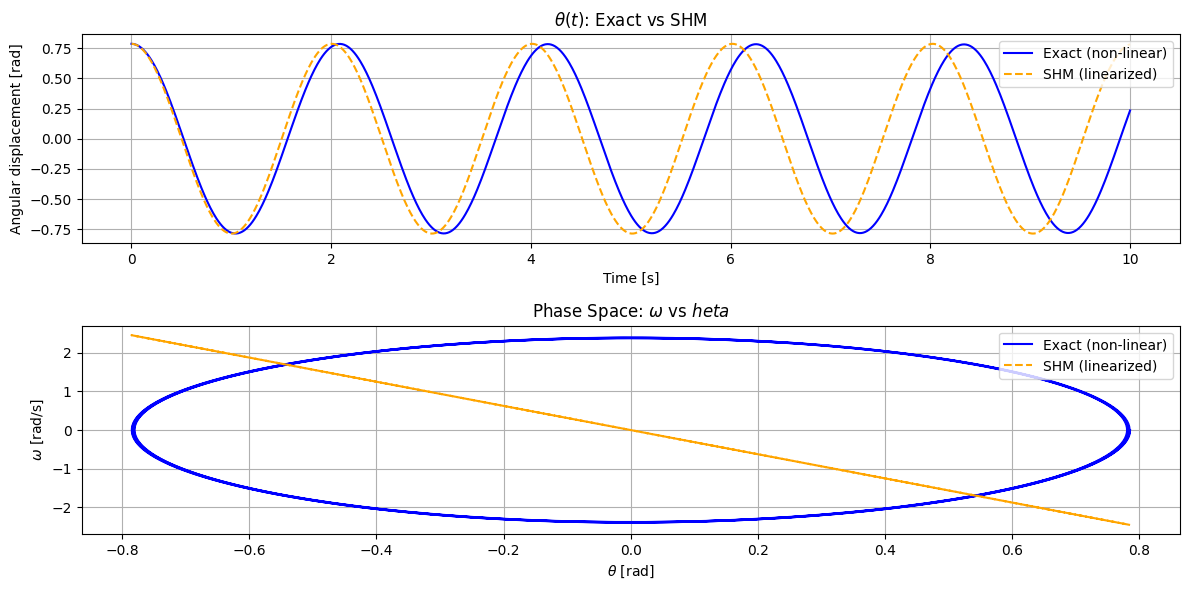

In [9]:
# SHM approximation: Analytical solution
def shm_solution(t, theta0, omega0, omega_natural):
    return theta0 * np.cos(omega_natural * t) + (omega0 / omega_natural) * np.sin(omega_natural * t)

# Main function
def main():
    t_range = (0, 10)
    t_points = 1000
    t_eval = np.linspace(t_range[0], t_range[1], t_points)

    # Exact solution
    ode_func = partial(pendulum_ode, params=PENDULUM_PARAMS)
    exact_solution = solve_pendulum(ode_func, [theta0, omega0], t_range, t_points)
    theta_exact = exact_solution.y[0]

    # SHM solution
    omega_natural = np.sqrt(PENDULUM_PARAMS["g"] / PENDULUM_PARAMS["L"])
    theta_shm = shm_solution(t_eval, theta0, omega0, omega_natural)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Theta vs time comparison
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, theta_exact, label="Exact (non-linear)", color="blue")
    plt.plot(t_eval, theta_shm, label="SHM (linearized)", linestyle="--", color="orange")
    plt.title(r"$\theta(t)$: Exact vs SHM")
    plt.xlabel("Time [s]")
    plt.ylabel("Angular displacement [rad]")
    plt.legend()
    plt.grid(True)

    # Phase space comparison
    plt.subplot(2, 1, 2)
    omega_exact = exact_solution.y[1]
    plt.plot(theta_exact, omega_exact, label="Exact (non-linear)", color="blue")
    plt.plot(theta_shm, -omega_natural * theta_shm, label="SHM (linearized)", linestyle="--", color="orange")
    plt.title("Phase Space: $\omega$ vs $\theta$")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel(r"$\omega$ [rad/s]")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run the comparison
if __name__ == "__main__":
    main()

# Double Pendulum I
As discussed in the class, a double pendulum with lengths $l_1=l_2 = 1$ and masses $m_1 = m_2 = 1$ have the following equation of motions,

[double pendulum drawing](http://rotations.berkeley.edu/wp-content/uploads/2017/10/double-pendulum.png)

\begin{align*}
    \frac{d\theta_1}{dt} &= \omega_1\\
    \frac{d\theta_2}{dt} &= \omega_2\\
    \frac{d\omega_1}{dt} &= -\frac{g(2\sin\theta_1 - \cos(\Delta \theta)\sin\theta_2) + \cos(\Delta \theta)\sin(\Delta \theta)\omega_1^2 + \sin(\Delta\theta)\omega_2^2}{1 +\sin^2(\Delta\theta)}\\
    \frac{d\omega_2}{dt} &= \frac{2g(\cos(\Delta\theta)\sin\theta_1 - \sin\theta_2) + 2\sin(\Delta\theta)\omega_1^2 + \cos(\Delta\theta)\sin(\Delta\theta)\omega_2^2}{1 + \sin^2(\Delta\theta)}
\end{align*}

with $\Delta\theta = \theta_1 - \theta_2$,

Q2.1) Write the code to solve for the motion of double pendulum.

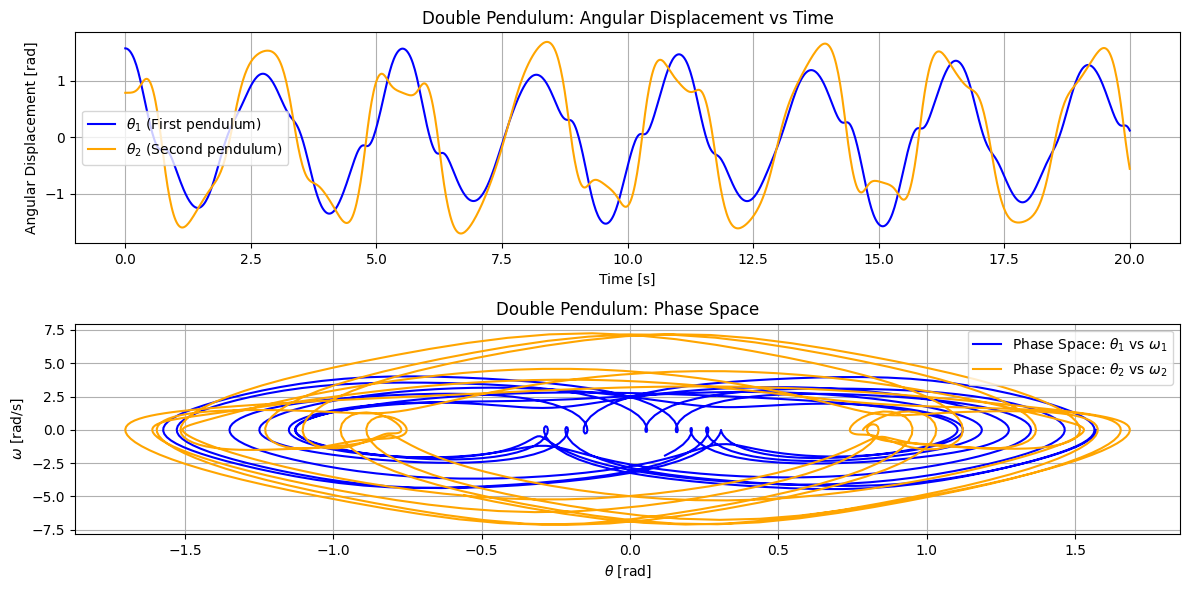

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from functools import partial

# Function to define pendulum parameters (returns an immutable dictionary)
def pendulum_params():
    return {"g": 9.81, "L1": 1.0, "L2": 1.0, "m1": 1.0, "m2": 1.0}

# Function to define the ODE system for the double pendulum
def double_pendulum_ode(t, y, params):
    g, L1, L2, m1, m2 = params["g"], params["L1"], params["L2"], params["m1"], params["m2"]
    theta1, omega1, theta2, omega2 = y

    delta = theta1 - theta2
    sin_delta, cos_delta = np.sin(delta), np.cos(delta)

    denom1 = (2 * m1 + m2 - m2 * cos_delta**2)
    denom2 = (L2 / L1) * denom1

    dtheta1_dt = omega1
    domega1_dt = (
        -g * (2 * m1 + m2) * np.sin(theta1)
        - m2 * g * np.sin(theta1 - 2 * theta2)
        - 2 * sin_delta * m2 * (omega2**2 * L2 + omega1**2 * L1 * cos_delta)
    ) / (L1 * denom1)

    dtheta2_dt = omega2
    domega2_dt = (
        2 * sin_delta
        * (
            omega1**2 * L1 * (m1 + m2)
            + g * (m1 + m2) * np.cos(theta1)
            + omega2**2 * L2 * m2 * cos_delta
        )
    ) / (L2 * denom2)

    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

# Function to solve the double pendulum system
def solve_double_pendulum(ode_func, initial_conditions, t_range, t_points):
    t_eval = np.linspace(t_range[0], t_range[1], t_points)
    return solve_ivp(ode_func, t_range, initial_conditions, t_eval=t_eval)

# Function to plot the results
def plot_pendulum_results(solution, title_theta_vs_t, title_phase_space):
    theta1, omega1, theta2, omega2 = solution.y
    t = solution.t

    # Plot angular displacement vs time
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, theta1, label=r'$\theta_1$ (First pendulum)', color="blue")
    plt.plot(t, theta2, label=r'$\theta_2$ (Second pendulum)', color="orange")
    plt.title(title_theta_vs_t)
    plt.xlabel("Time [s]")
    plt.ylabel("Angular Displacement [rad]")
    plt.legend()
    plt.grid(True)

    # Plot phase space
    plt.subplot(2, 1, 2)
    plt.plot(theta1, omega1, label=r'Phase Space: $\theta_1$ vs $\omega_1$', color="blue")
    plt.plot(theta2, omega2, label=r'Phase Space: $\theta_2$ vs $\omega_2$', color="orange")
    plt.title(title_phase_space)
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel(r"$\omega$ [rad/s]")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main functional pipeline
def main():
    # Retrieve pendulum parameters
    params = pendulum_params()

    # Define initial conditions [theta1, omega1, theta2, omega2]
    initial_conditions = [np.pi / 2, 0.0, np.pi / 4, 0.0]  # 90° and 45°, both at rest

    # Define time range and resolution
    t_range = (0, 20)  # Time span in seconds
    t_points = 1000    # Number of points for evaluation

    # Create a partial function for the ODE system to inject parameters
    ode_func = partial(double_pendulum_ode, params=params)

    # Solve the system
    solution = solve_double_pendulum(ode_func, initial_conditions, t_range, t_points)

    # Plot results
    plot_pendulum_results(
        solution,
        title_theta_vs_t="Double Pendulum: Angular Displacement vs Time",
        title_phase_space="Double Pendulum: Phase Space"
    )

# Execute the main pipeline
if __name__ == "__main__":
    main()


#### Small Displacement

First we will look at the case when initial displacement is very small, small enough that we can appoximate $\sin\theta$ as $\theta$. 

**Q2.2)** Figure out typical angle (in degrees) where small angle approximation ($\sin\theta\approx \theta$) breaks down.

In [14]:
import numpy as np
from scipy.optimize import minimize_scalar

# Define the relative error function
def relative_error(theta):
    return np.abs(np.sin(theta) - theta) / np.abs(np.sin(theta))

# Find the angle where the relative error exceeds 1%
def critical_angle(threshold=0.01):
    # Minimize the negative of the error difference to find the threshold crossing point
    result = minimize_scalar(
        lambda theta: abs(relative_error(theta) - threshold),
        bounds=(0, np.pi / 2),
        method='bounded'
    )
    theta_critical = result.x  # Critical angle in radians
    return np.degrees(theta_critical)  # Convert to degrees

# Compute and display the critical angle
angle_degrees = critical_angle()
print(f"Critical angle: {angle_degrees:.2f} degrees")


Critical angle: 13.99 degrees


**Q2.3)** Take your intial condition of angles such that the appximation holds and intial angular momenta to be zero and plot $\theta_1(t)$ vs $\theta_2(t)$.

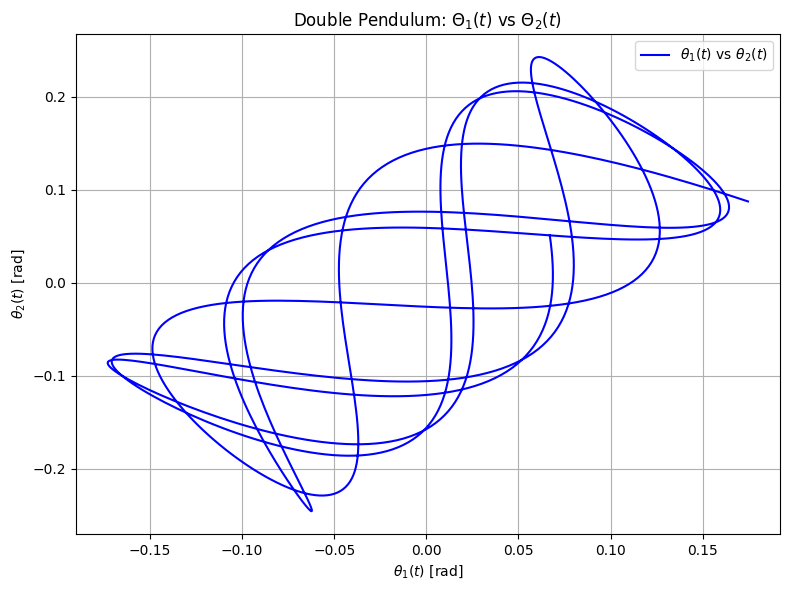

In [16]:
# Main function to run the simulation and plot
def main():
    # Parameters
    params = pendulum_params()
    
    # Initial conditions: small angles (<14°) and zero angular velocity
    theta1_0 = np.radians(10)  # 10 degrees
    theta2_0 = np.radians(5)   # 5 degrees
    omega1_0 = 0.0             # Zero initial angular velocity
    omega2_0 = 0.0
    initial_conditions = [theta1_0, omega1_0, theta2_0, omega2_0]

    # Time range and resolution
    t_range = (0, 10)  # 10 seconds of simulation
    t_points = 1000    # Resolution

    # Create a partial function for the ODE system to inject parameters
    ode_func = partial(double_pendulum_ode, params=params)

    # Solve the system
    solution = solve_double_pendulum(ode_func, initial_conditions, t_range, t_points)

    # Extract the results
    theta1 = solution.y[0]
    theta2 = solution.y[2]

    # Plot theta1(t) vs theta2(t)
    plt.figure(figsize=(8, 6))
    plt.plot(theta1, theta2, label=r"$\theta_1(t)$ vs $\theta_2(t)$", color="blue")
    plt.title("Double Pendulum: $\Theta_1(t)$ vs $\Theta_2(t)$")
    plt.xlabel(r"$\theta_1(t)$ [rad]")
    plt.ylabel(r"$\theta_2(t)$ [rad]")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the simulation
if __name__ == "__main__":
    main()

The curve that you obtained are known as [Lissajous curve](https://en.wikipedia.org/wiki/Lissajous_curve).


**Bonus Question:** Can you use the small angle approximation i.e. $\sin\theta\approx \theta$, $\cos\theta \approx 1$ and $\omega_1 \approx \omega_2 \approx 0$ in the equation of motion for double pendulum to derive the parameteric formula given in the wikipedia article.


**Q2.4)** Repeat the same task with medium displacement where $\theta_1$ and $\theta_2$ are in between $0.5$ and $1$ radian. 

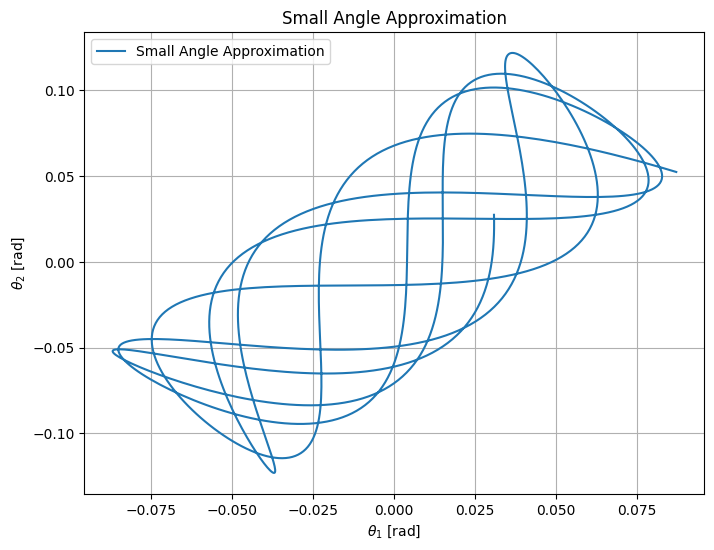

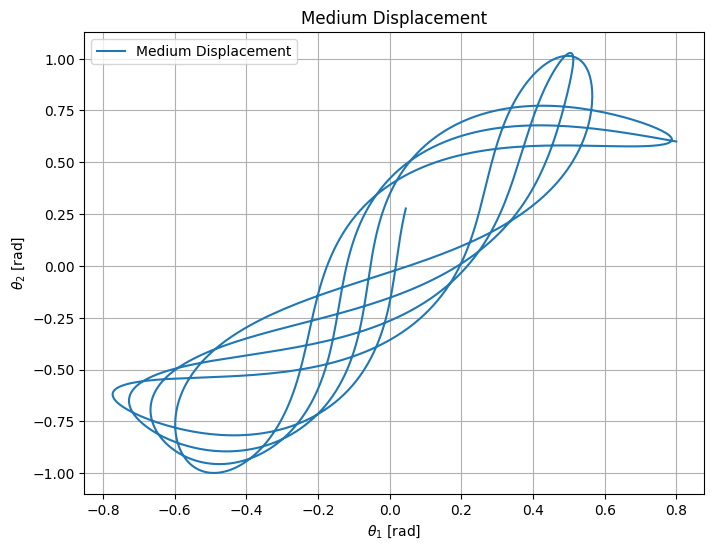

In [29]:
# plot
def plot(solution, title):
    theta1, theta2 = solution.y[0], solution.y[2]

    plt.figure(figsize=(8, 6))
    plt.plot(theta1, theta2, label=title)
    plt.xlabel(r"$\theta_1$ [rad]")
    plt.ylabel(r"$\theta_2$ [rad]")
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()

# Main function to run the simulation and plot
def main():
    # Parameters
    params = pendulum_params()
    
    # Initial conditions for small angle
    initial_conditions_small = [np.radians(5), 0.0, np.radians(3), 0.0]

    # Initial conditions for medium displacement
    initial_conditions_medium = [0.8, 0.0, 0.6, 0.0]

    # Time range and resolution
    t_span = (0, 10)  # 10 seconds of simulation
    t_points = 1000    # Resolution

    # Time span
    t_span = (0, 10)

    # Create a partial function for the ODE system to inject parameters
    ode_func = partial(double_pendulum_ode, params=params)

    # Solve the system
    solution_small = solve_double_pendulum(ode_func, initial_conditions_small, t_span, t_points)
    plot(solution_small, "Small Angle Approximation")

    # Solve the system
    solution_medium = solve_double_pendulum(ode_func, initial_conditions_medium, t_span, t_points)
    plot(solution_medium, "Medium Displacement")

# Run the simulation
if __name__ == "__main__":
    main()

### Compare
To the small angle approximation

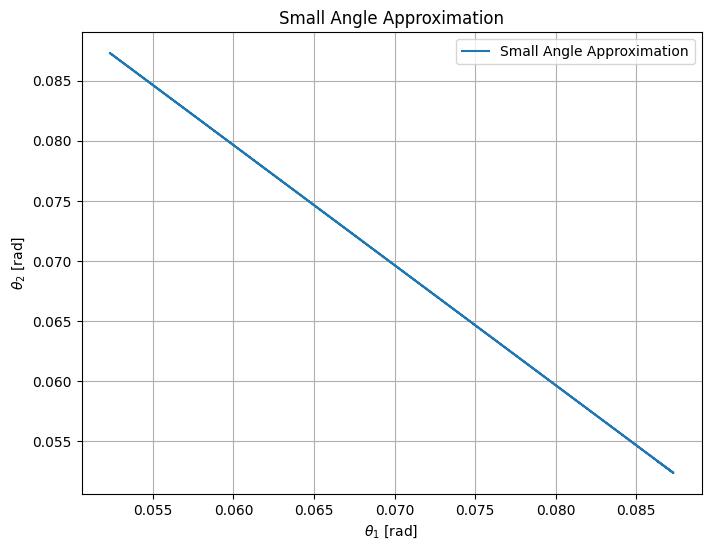

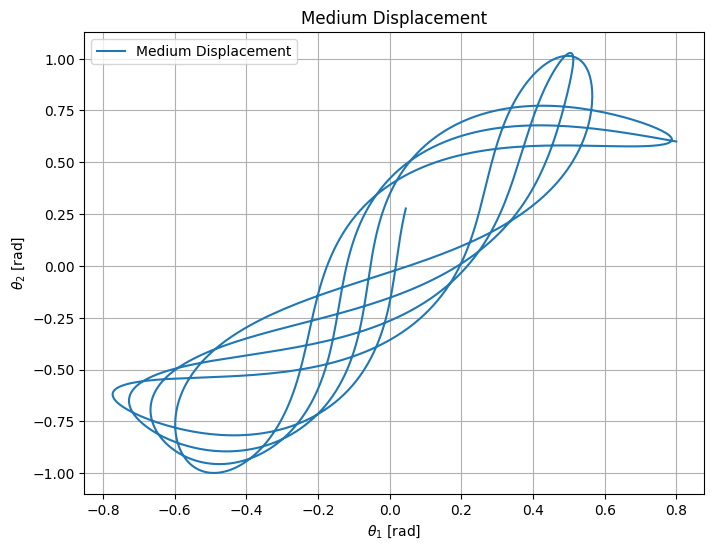

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
params = {
    "g": 9.81,
    "L1": 1.0,
    "L2": 1.0,
    "m1": 1.0,
    "m2": 1.0,
}

# Equations of motion with small-angle approximation
def small_angle_ode(t, y, params):
    g, L1, L2, m1, m2 = params["g"], params["L1"], params["L2"], params["m1"], params["m2"]
    theta1, omega1, theta2, omega2 = y

    # Linearized system
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    domega1_dt = -(g / L1) * theta1 + (m2 * g / L1) * theta2
    domega2_dt = -(g / L2) * theta2 + (m2 * g / L2) * theta1

    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

# Solve
def solve(ode_func, initial_conditions, t_span, t_points=1000):
    t_eval = np.linspace(t_span[0], t_span[1], t_points)
    return solve_ivp(ode_func, t_span, initial_conditions, t_eval=t_eval)

# plot
def plot(solution, title):
    theta1, theta2 = solution.y[0], solution.y[2]

    plt.figure(figsize=(8, 6))
    plt.plot(theta1, theta2, label=title)
    plt.xlabel(r"$\theta_1$ [rad]")
    plt.ylabel(r"$\theta_2$ [rad]")
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()

# Main functional pipeline
def main():
    # Initial conditions for small angle
    initial_conditions_small = [np.radians(5), 0.0, np.radians(3), 0.0]

    # Initial conditions for medium displacement
    initial_conditions_medium = [0.8, 0.0, 0.6, 0.0]

    # Time span
    t_span = (0, 10)

    # Create a partial function for the ODE system to inject parameters
    small_ode = partial(small_angle_ode, params=params)
    # Solve the system
    solution_small = solve(small_ode, initial_conditions_small, t_span)
    plot(solution_small, "Small Angle Approximation")

    # Create a partial function for the ODE system to inject parameters
    medium_ode = partial(double_pendulum_ode, params=params)
    # Solve the system
    solution_medium = solve(medium_ode, initial_conditions_medium, t_span)
    plot(solution_medium, "Medium Displacement")
# Execute the main pipeline
if __name__ == "__main__":
    main()


**Q2.5)** Repeat the same task with large displacements. The resultant plot should look like a brownian motion path. 

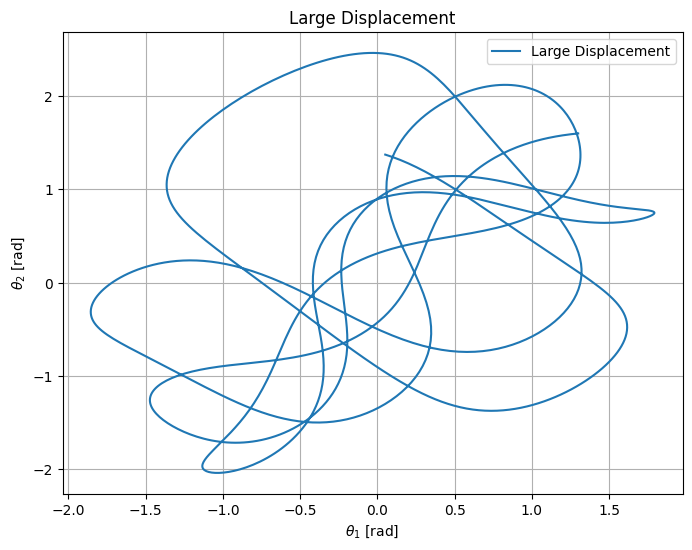

In [ ]:
# Main function to run the simulation and plot
def main():
    # Parameters
    params = pendulum_params()

    # Initial conditions for large displacement
    initial_conditions_large = [1.3, 0.0, 1.6, 0.0]

    # Time range and resolution
    t_span = (0, 10)  # 10 seconds of simulation
    t_points = 1000    # Resolution

    # Time span
    t_span = (0, 10)

    # Create a partial function for the ODE system to inject parameters
    large_ode = partial(double_pendulum_ode, params=params)
    # Solve the system
    solution_large = solve_double_pendulum(large_ode, initial_conditions_large, t_span, t_points)
    plot(solution_large, "Large Displacement")

# Run the simulation
if __name__ == "__main__":
    main()

**Q2.6)** Take two double pendula starting from similar intial condition and plot the evolution of $\theta_2$. What do you see?

1000 1000


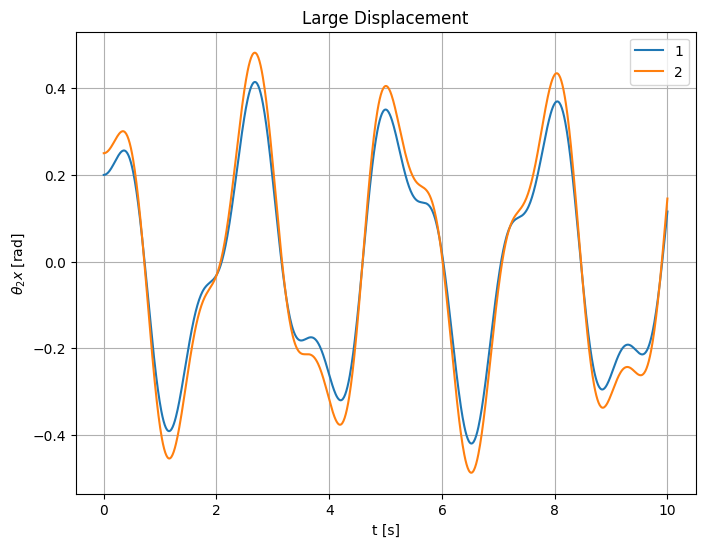

In [47]:
# Main function to run the simulation and plot
def main():
    def plot(solution1 ,solution2, title):
        theta2_1, t = solution1.y[2], solution1.t
        theta2_2 = solution2.y[2]
        print(len(theta2_1), len(t))
        plt.figure(figsize=(8, 6))
        plt.plot(t, theta2_1, label="1")
        plt.plot(t, theta2_2, label="2")
        plt.xlabel(r"t [s]")
        plt.ylabel(r"$\theta_2 x$ [rad]")
        plt.grid(True)
        plt.legend()
        plt.title(title)
        plt.show()
    # Parameters
    params = pendulum_params()

    # Initial conditions
    initial_conditions_1 = [0.3, 0.0, 0.2, 0.0]
    initial_conditions_2 = [0.35, 0.0, 0.25, 0.0]

    # Time range and resolution
    t_span = (0, 10)  # 10 seconds of simulation
    t_points = 1000    # Resolution

    # Create a partial function for the ODE system to inject parameters
    ode_func = partial(double_pendulum_ode, params=params)

   # Solve the system
    solution1 = solve_double_pendulum(ode_func, initial_conditions_1, t_span, t_points)
    solution2 = solve_double_pendulum(ode_func, initial_conditions_2, t_span, t_points)

    plot(solution1, solution2, "Large Displacement")

# Run the simulation
if __name__ == "__main__":
    main()

1000 1000


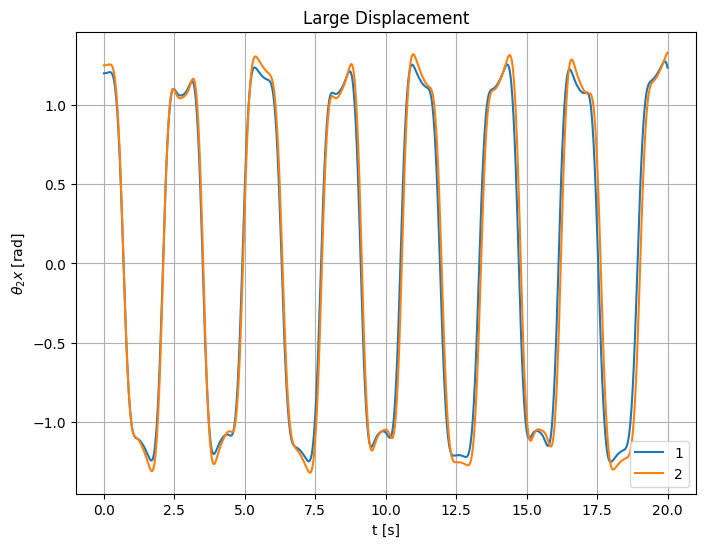

In [49]:
# Main function to run the simulation and plot
def main():
    def plot(solution1 ,solution2, title):
        theta2_1, t = solution1.y[2], solution1.t
        theta2_2 = solution2.y[2]
        print(len(theta2_1), len(t))
        plt.figure(figsize=(8, 6))
        plt.plot(t, theta2_1, label="1")
        plt.plot(t, theta2_2, label="2")
        plt.xlabel(r"t [s]")
        plt.ylabel(r"$\theta_2 x$ [rad]")
        plt.grid(True)
        plt.legend()
        plt.title(title)
        plt.show()
    # Parameters
    params = pendulum_params()

    # Initial conditions
    initial_conditions_1 = [1.3, 0.0, 1.2, 0.0]
    initial_conditions_2 = [1.35, 0.0, 1.25, 0.0]

    # Time range and resolution
    t_span = (0, 20)  # 10 seconds of simulation
    t_points = 1000    # Resolution

    # Create a partial function for the ODE system to inject parameters
    ode_func = partial(double_pendulum_ode, params=params)

   # Solve the system
    solution1 = solve_double_pendulum(ode_func, initial_conditions_1, t_span, t_points)
    solution2 = solve_double_pendulum(ode_func, initial_conditions_2, t_span, t_points)

    plot(solution1, solution2, "Large Displacement")

# Run the simulation
if __name__ == "__main__":
    main()